<a href="https://colab.research.google.com/github/DhanashreeAmbekar/Machine-Learning/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Time Series Decomposition

In [1]:
%pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.4 MB/s eta 0:00:00


In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
url="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/AirPassengers.csv"
print(url)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/AirPassengers.csv


In [4]:
import pandas as pd
df=pd.read_csv(url,parse_dates=True,index_col="Month")
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


### plot the graph for Number of passengers

In [5]:
import matplotlib .pyplot as plt
import seaborn as sns

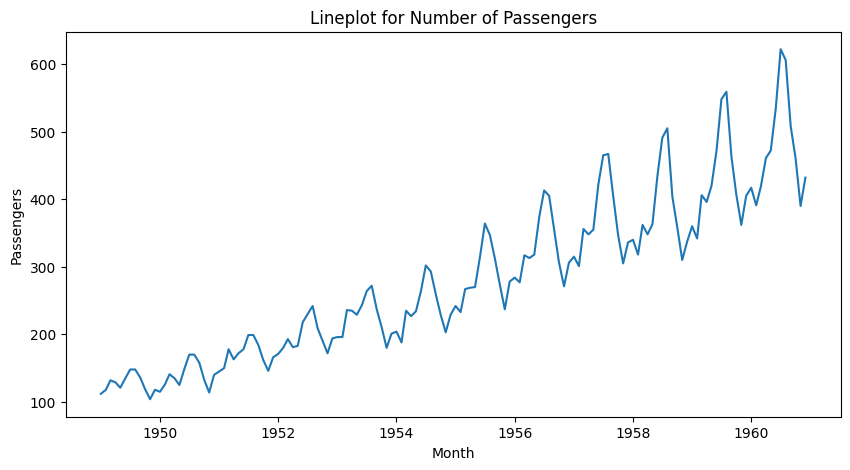

In [7]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x=df.index, y="Passengers")
plt.title("Lineplot for Number of Passengers")
plt.show()

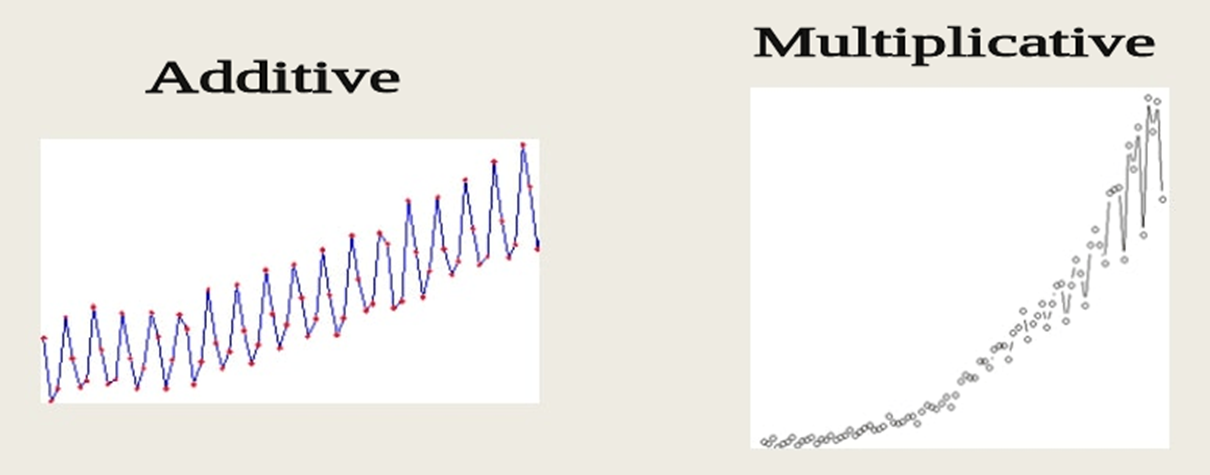

### Time Series Decomposition

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
q = seasonal_decompose(df["Passengers"], model="multiplicative")


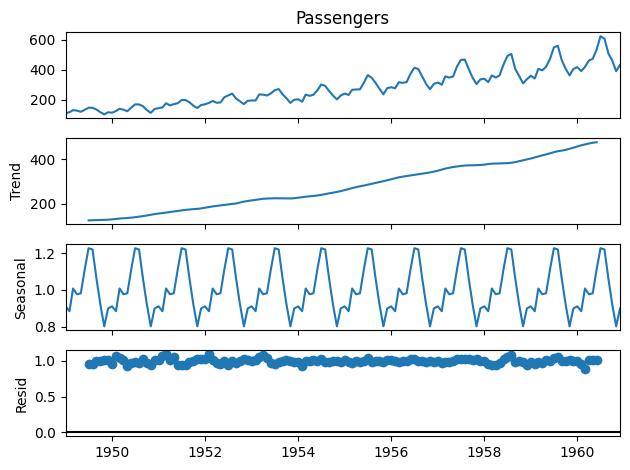

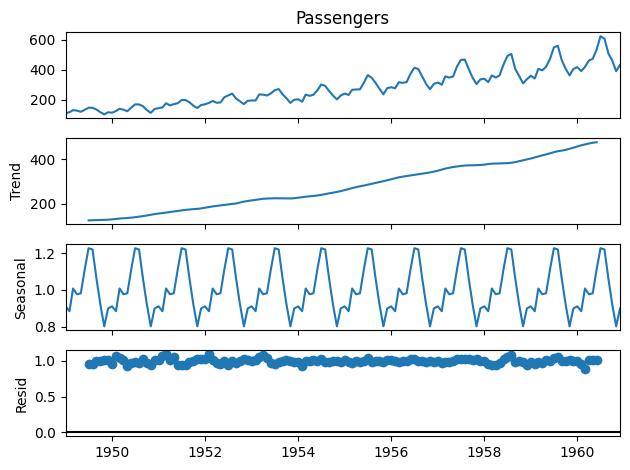

In [10]:
q.plot()

### Showing observed value and trend

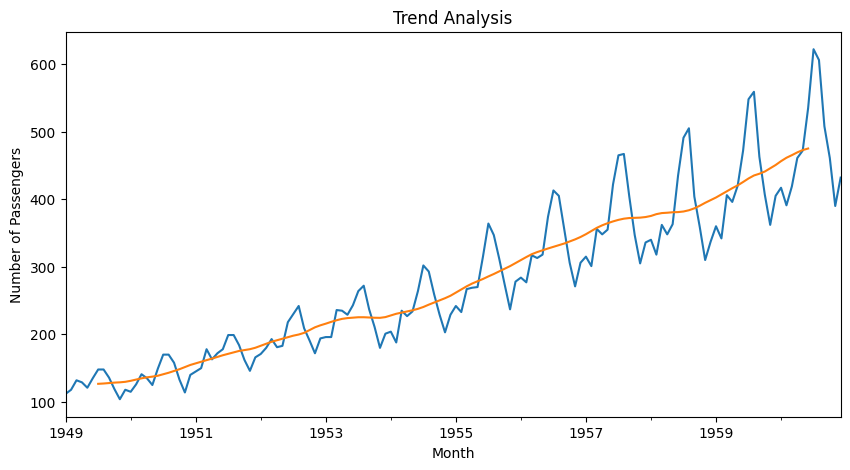

In [11]:
plt.figure(figsize=(10, 5))
q.observed.plot()
q.trend.plot()
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.title("Trend Analysis")
plt.show()

### show Seasonality

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

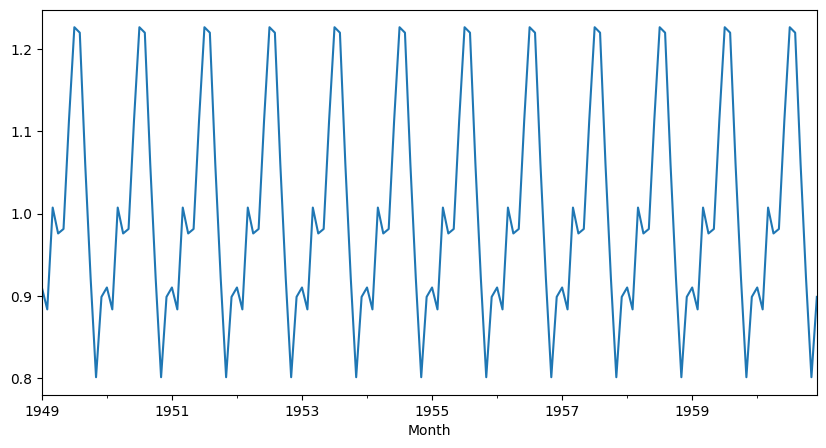

In [13]:
plt.figure(figsize=(10,5))
q.seasonal.plot()
plt.xlable("Month")
plt.ylable("Seasonal Passengers")
plt.title("Seasonal Analysis")
plt.show()

### Show Residuals

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

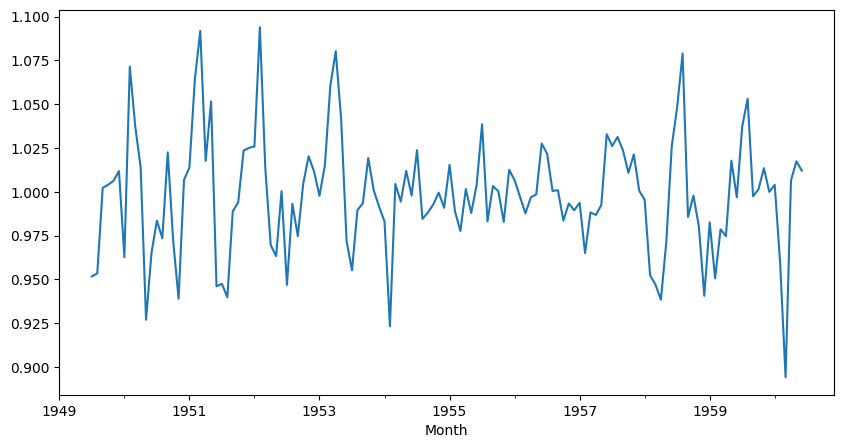

In [14]:
plt.figure(figsize=(10,5))
q.resid.plot()
plt.xlable("Month")
plt.ylable("Residual passengers")
plt.title("Residual Analysis")
plt.show()

### Above is Multiplicative model hence

yt = Trend x Seasson x Residuals

### Time Series Forecasting

Best on past data try to estimate the future values

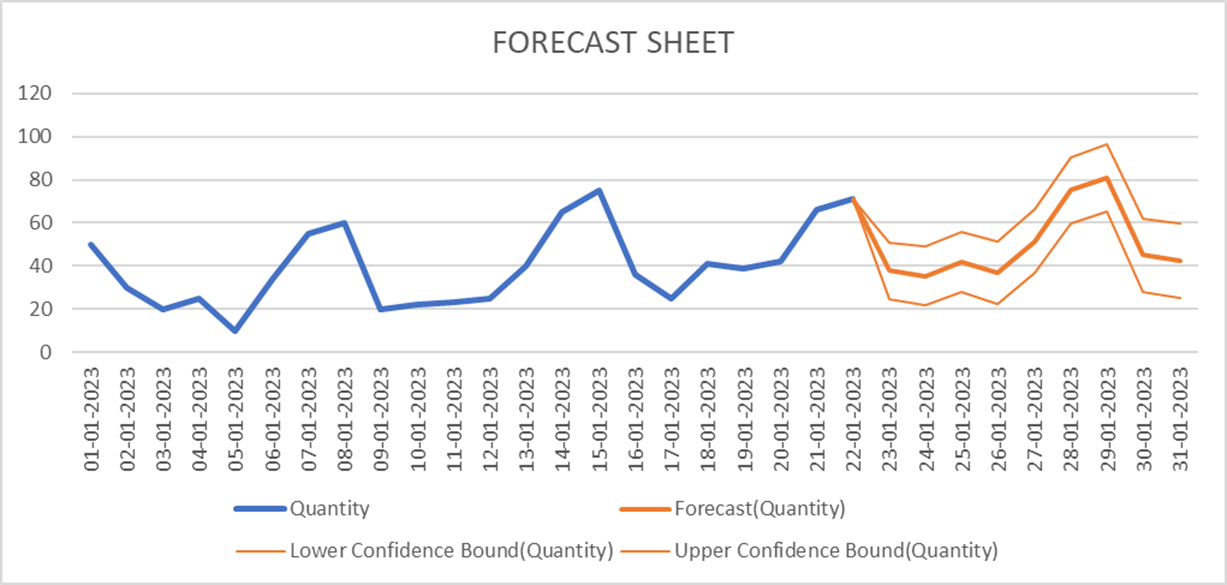

In [15]:
from pmdarima.arima import auto_arima

In [16]:
model = auto_arima(df["Passengers"], seasonal=True, m=12)

In [17]:
model.order

(2, 1, 1)

### ARMIA(2,1,1)

p=2, d=1, q=1

In [18]:
model

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

### Estimate future 4 year demand for Air Passengers

4year = 4*12 = 48 months

In [19]:
forecast, conf = model.predict(n_periods=48, return_conf_int=True)


In [20]:
forecast

,0
1961-01-01,445.634934
1961-02-01,420.395024
1961-03-01,449.198348
1961-04-01,491.839976
1961-05-01,503.394502
1961-06-01,566.862471
1961-07-01,654.260189
1961-08-01,638.597493
1961-09-01,540.883739
1961-10-01,494.126610


In [21]:
conf

array([[423.34484757, 467.92501952],
       [394.23539679, 446.55465213],
       [419.83171141, 478.56498452],
       [460.37625926, 523.30369276],
       [470.38045292, 536.40855182],
       [532.69931939, 601.02562216],
       [619.22112948, 689.29924892],
       [602.87983183, 674.31515457],
       [504.63120707, 577.13627077],
       [457.44583825, 530.80738157],
       [386.30372821, 460.36165208],
       [428.1911891 , 502.82391072],
       [433.49735818, 525.08434836],
       [405.10869698, 503.24497681],
       [431.1554372 , 535.01852521],
       [471.84033434, 579.79816045],
       [481.87334967, 593.02801195],
       [544.15634767, 657.81146303],
       [630.60850683, 746.26548123],
       [614.17889589, 731.46366422],
       [515.83210925, 634.46267142],
       [468.54379213, 588.30438119],
       [397.29693225, 518.02080357],
       [439.07958457, 560.63657678],
       [446.3268565 , 580.99723894],
       [418.31792814, 558.81320108],
       [444.62395763, 590.35721439],
 

In [22]:
forecast = forecast.to_frame()
forecast.columns = ["forecast"]

In [23]:
forecast[["lower", "upper"]] = conf

In [24]:
forecast = forecast.round(0)

In [25]:
forecast

,forecast,lower,upper
1961-01-01,446.0,423.0,468.0
1961-02-01,420.0,394.0,447.0
1961-03-01,449.0,420.0,479.0
1961-04-01,492.0,460.0,523.0
1961-05-01,503.0,470.0,536.0
1961-06-01,567.0,533.0,601.0
1961-07-01,654.0,619.0,689.0
1961-08-01,639.0,603.0,674.0
1961-09-01,541.0,505.0,577.0
1961-10-01,494.0,457.0,531.0


### save above dataframe

In [26]:
forecast.to_csv("Forecast.csv")

### plot the results

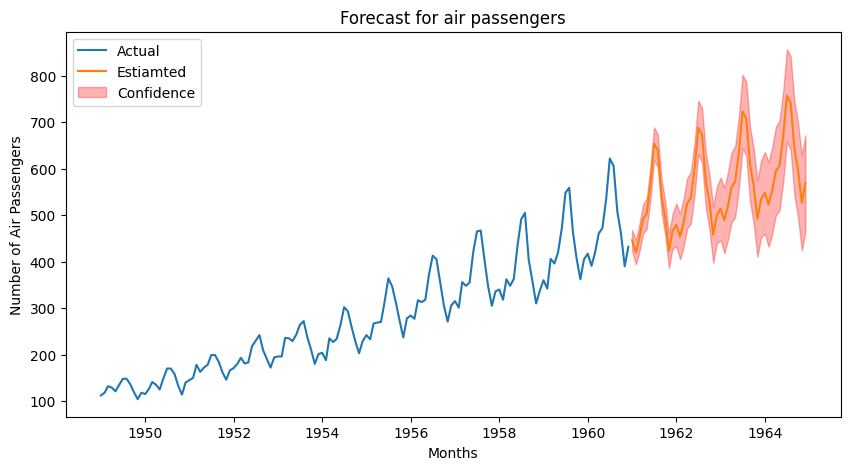

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(df["Passengers"], label="Actual")
plt.plot(forecast["forecast"], label="Estiamted")
plt.fill_between(
    forecast.index, forecast["lower"], forecast["upper"], alpha=0.3, label="Confidence", color="red")
plt.xlabel("Months")
plt.ylabel("Number of Air Passengers")
plt.title("Forecast for air passengers")
plt.legend()
plt.show()

### save above model

In [28]:
%pip install joblib

In [29]:
import joblib

joblib.dump(model, "arima.joblib")


['arima.joblib']

In [30]:
m = joblib.load("/content/arima.joblib")
m

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)